In [3]:
from CATH_disorder import *
%matplotlib inline

In [4]:
df = pd.read_csv('./compiled.tsv', sep='\t', index_col=0)
sfam = pd.read_csv('./sfam_compiled.tsv', sep='\t', index_col=0)

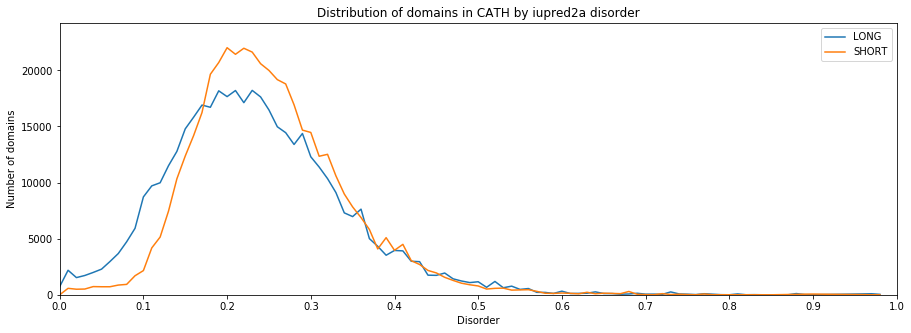

In [5]:
def plt_hist(df):
    fig, ax = plt.subplots(figsize=(15,5))
    long = df.LONG.round(2).value_counts().sort_index()
    short = df.SHORT.round(2).value_counts().sort_index()
    ax.set_xticks(np.arange(0.0,1.1, 0.1))
    ax.set_xlim(0,1)
    ax.set_ylim(0,max(max(long),max(short))*1.1)
    ax.plot(long, linewidth=1.5, label='LONG')
    ax.plot(short, linewidth=1.5, label='SHORT')
    plt.legend()
    plt.title('Distribution of domains in CATH by iupred2a disorder')
    plt.xlabel('Disorder')
    plt.ylabel('Number of domains')
    plt.savefig('./figs/all_domains.png', bbox_inches='tight')
    plt.show()

plt_hist(df)


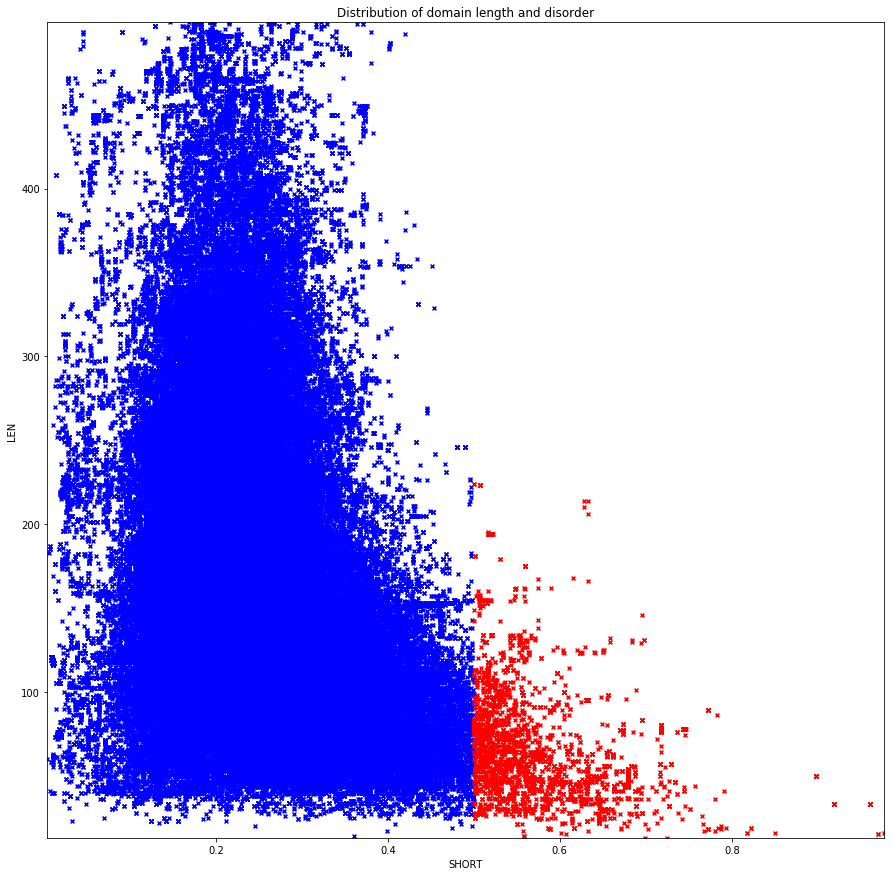

In [6]:
plt_scatter(df[df.LEN < 500], 'LEN', 'SHORT',
           col_cutoff='SHORT', cutoff=0.5,
           savedname='./figs/LEN_SHORT_scatter.png',
           title='Distribution of domain length and disorder')

In [7]:
print("Method used - LONG\n")
print("Proportion of superfamilies with disorder over 0.5")
print(round(len(sfam.LONG[sfam.LONG>0.5])/len(sfam.LONG)*100,3))
print("\nProportion of domains with disorder over 0.5")
print(round(len(df.LONG[df.LONG > 0.5])/len(df)*100, 3))

Method used - LONG

Proportion of superfamilies with disorder over 0.5
3.072

Proportion of domains with disorder over 0.5
1.81


In [8]:
print("Method used - SHORT\n")
print("Proportion of superfamilies with disorder over 0.5")
print(round(len(sfam.SHORT[sfam.SHORT>0.5])/len(sfam.SHORT)*100,3))
print("\nProportion of domains with disorder over 0.5")
print(round(len(df.SHORT[df.SHORT > 0.5])/len(df)*100, 3))

Method used - SHORT

Proportion of superfamilies with disorder over 0.5
3.154

Proportion of domains with disorder over 0.5
1.328


In [9]:
print('Correlation between method difference and domain length (all)')
print(round(sfam.DIFF.corr(sfam.LEN), 3))
print('\nCorrelation between method difference and domain length (domains under 150 aa long)')
print(round(sfam[sfam.LEN<150].DIFF.corr(sfam[sfam.LEN<150].LEN), 3))

Correlation between method difference and domain length (all)
-0.424

Correlation between method difference and domain length (domains under 150 aa long)
-0.535


In [10]:
print("Mean length of all domains in CATH")
print(round(df.LEN.mean()))
print("\nMean length of domains in CATH with disorder over 0.5")
print(round(df[df.SHORT<0.5].LEN.mean()))
print("\nMean length of domains in CATH with disorder under 0.5")
print(round(df[df.SHORT>0.5].LEN.mean()))


Mean length of all domains in CATH
161.0

Mean length of domains in CATH with disorder over 0.5
162.0

Mean length of domains in CATH with disorder under 0.5
68.0
